In [1]:
# import necessary libraries for the analysis
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
1. hotspot for each type
2?. hotspot for all
3?. hotspot for destructive svs (exclud. dup)

In [2]:
gene_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/unique_gene_only_annotated'

small_del_ext = '/small_dels'
large_del_ext = '/large_svs/DEL'
large_dup_ext = '/large_svs/DUP'
large_inv_ext = '/large_svs/INV'

In [32]:
small_del_gene_list_df_names = []

os.chdir(gene_list_path + small_del_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + small_del_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4] + '_small_del'] = pd.read_csv(file_name)
    small_del_gene_list_df_names.append(file_name[:-4] + '_small_del')

In [4]:
large_del_gene_list_df_names = []

os.chdir(gene_list_path + large_del_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_del_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4] + '_large_del'] = pd.read_csv(file_name)
    large_del_gene_list_df_names.append(file_name[:-4] + '_large_del')

In [5]:
large_dup_gene_list_df_names = []

os.chdir(gene_list_path + large_dup_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_dup_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4] + '_large_dup'] = pd.read_csv(file_name)
    large_dup_gene_list_df_names.append(file_name[:-4] + '_large_dup')

In [6]:
large_inv_gene_list_df_names = []

os.chdir(gene_list_path + large_inv_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_inv_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4] + '_large_inv'] = pd.read_csv(file_name)
    large_inv_gene_list_df_names.append(file_name[:-4] + '_large_inv')

In [33]:
small_del_gene_list_df_names[0][:-35]

'A_RR_GBM809'

## 1. Type-specific

In [34]:
output_dict_small_del = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in small_del_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-35]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_small_del['gene_name']:
            
            output_dict_small_del['chr'].append(row['chr'])
            output_dict_small_del['start'].append(row['start'])
            output_dict_small_del['end'].append(row['end'])
            output_dict_small_del['gene_id'].append(row['gene_id'])
            output_dict_small_del['gene_name'].append(row['gene_name'])
            output_dict_small_del['gene_type'].append(row['gene_type'])
            
            output_dict_small_del['input_sample_ids'].append([df_name[:-35]])
            output_dict_small_del['count'].append(1)
            output_dict_small_del['exon_count'].append(row['exon_affected'])
            output_dict_small_del['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_small_del['gene_name'].index(row['gene_name'])
                
                output_dict_small_del['input_sample_ids'][temp_ind].append(df_name[:-35])
                
                output_dict_small_del['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_small_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_small_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_small_del['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_small_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_small_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])


Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [8]:
output_dict_large_del = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_del_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-35]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_del['gene_name']:
            
            output_dict_large_del['chr'].append(row['chr'])
            output_dict_large_del['start'].append(row['start'])
            output_dict_large_del['end'].append(row['end'])
            output_dict_large_del['gene_id'].append(row['gene_id'])
            output_dict_large_del['gene_name'].append(row['gene_name'])
            output_dict_large_del['gene_type'].append(row['gene_type'])
            
            output_dict_large_del['input_sample_ids'].append([df_name[:-35]])
            output_dict_large_del['count'].append(1)
            output_dict_large_del['exon_count'].append(row['exon_affected'])
            output_dict_large_del['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_del['gene_name'].index(row['gene_name'])
                
                output_dict_large_del['input_sample_ids'][temp_ind].append(df_name[:-35])
                
                output_dict_large_del['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_del['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])



Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [9]:
output_dict_large_dup = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_dup_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-35]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_dup['gene_name']:
            
            output_dict_large_dup['chr'].append(row['chr'])
            output_dict_large_dup['start'].append(row['start'])
            output_dict_large_dup['end'].append(row['end'])
            output_dict_large_dup['gene_id'].append(row['gene_id'])
            output_dict_large_dup['gene_name'].append(row['gene_name'])
            output_dict_large_dup['gene_type'].append(row['gene_type'])
            
            output_dict_large_dup['input_sample_ids'].append([df_name[:-35]])
            output_dict_large_dup['count'].append(1)
            output_dict_large_dup['exon_count'].append(row['exon_affected'])
            output_dict_large_dup['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_dup['gene_name'].index(row['gene_name'])
                
                output_dict_large_dup['input_sample_ids'][temp_ind].append(df_name[:-35])
                
                output_dict_large_dup['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_dup['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_dup['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_dup['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_dup['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_dup['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])


Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [10]:
output_dict_large_inv = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_inv_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-35]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_inv['gene_name']:
            
            output_dict_large_inv['chr'].append(row['chr'])
            output_dict_large_inv['start'].append(row['start'])
            output_dict_large_inv['end'].append(row['end'])
            output_dict_large_inv['gene_id'].append(row['gene_id'])
            output_dict_large_inv['gene_name'].append(row['gene_name'])
            output_dict_large_inv['gene_type'].append(row['gene_type'])
            
            output_dict_large_inv['input_sample_ids'].append([df_name[:-35]])
            output_dict_large_inv['count'].append(1)
            output_dict_large_inv['exon_count'].append(row['exon_affected'])
            output_dict_large_inv['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_inv['gene_name'].index(row['gene_name'])
                
                output_dict_large_inv['input_sample_ids'][temp_ind].append(df_name[:-35])
                
                output_dict_large_inv['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_inv['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_inv['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_inv['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_inv['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_inv['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])


Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: N_P_BT2013110
Currently analyzin

In [11]:
# output_df_small_del = pd.DataFrame.from_dict(output_dict_small_del)

output_df_large_del = pd.DataFrame.from_dict(output_dict_large_del)

output_df_large_dup = pd.DataFrame.from_dict(output_dict_large_dup)

output_df_large_inv = pd.DataFrame.from_dict(output_dict_large_inv)


In [26]:
output_df_small_del_sorted = output_df_small_del.sort_values('count', ascending=False)
output_df_small_del_sorted = output_df_small_del_sorted.reset_index(drop=True)

small_del_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_small_del_sorted.to_csv((small_del_hotspot_path + 'small_del_hotspot.csv'), index=False, sep=',')

In [12]:
output_df_large_del_sorted = output_df_large_del.sort_values('count', ascending=False)
output_df_large_del_sorted = output_df_large_del_sorted.reset_index(drop=True)

large_del_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_del_sorted.to_csv((large_del_hotspot_path + 'large_del_hotspot.csv'), index=False, sep=',')

In [13]:
output_df_large_dup_sorted = output_df_large_dup.sort_values('count', ascending=False)
output_df_large_dup_sorted = output_df_large_dup_sorted.reset_index(drop=True)

large_dup_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_dup_sorted.to_csv((large_dup_hotspot_path + 'large_dup_hotspot.csv'), index=False, sep=',')

In [14]:
output_df_large_inv_sorted = output_df_large_inv.sort_values('count', ascending=False)
output_df_large_inv_sorted = output_df_large_inv_sorted.reset_index(drop=True)

large_inv_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_inv_sorted.to_csv((large_inv_hotspot_path + 'large_inv_hotspot.csv'), index=False, sep=',')

# Visualization

In [15]:
def count_elements(numbers):
    
    count_dict = {}
    
    for num in numbers:
    
        if num in count_dict:
            count_dict[num] += 1
        
        else:
            count_dict[num] = 1

    return count_dict

In [16]:
### Large DELs

output_df_large_del_sorted_protein_coding = \
output_df_large_del_sorted[output_df_large_del_sorted['gene_type'] == 'protein_coding']

output_df_large_del_sorted_protein_coding_bigger_than_1 = \
output_df_large_del_sorted_protein_coding[output_df_large_del_sorted_protein_coding['count'] > 1]

In [17]:
output_df_large_dup_sorted[output_df_large_dup_sorted['gene_type'] == 'miRNA']


,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
77,chr7,64679064,64679176,ENSG00000275667.1,MIR6839,miRNA,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",13,13,0
216,chr7,93482760,93482855,ENSG00000208014.1,MIR653,miRNA,"[C_P_GBM577, E_RR_GBM937, G_R_GBM833, J_P_GBM4...",12,12,0
217,chr7,93483936,93484019,ENSG00000207656.1,MIR489,miRNA,"[C_P_GBM577, E_RR_GBM937, G_R_GBM833, J_P_GBM4...",12,12,0
220,chr7,93716928,93717005,ENSG00000265423.1,MIR4652,miRNA,"[C_P_GBM577, E_RR_GBM937, G_R_GBM833, J_P_GBM4...",12,12,0
274,chr7,117020211,117020319,ENSG00000283923.1,MIR6132,miRNA,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,0
...,...,...,...,...,...,...,...,...,...,...
24279,chr1,167998660,167998726,ENSG00000221545.1,MIR1255B2,miRNA,[H_R_GBM492],1,1,0
24315,chr1,168375524,168375621,ENSG00000207974.1,MIR557,miRNA,[H_R_GBM492],1,1,0
24436,chr1,177029363,177029445,ENSG00000202609.4,MIR488,miRNA,[H_R_GBM492],1,1,0
24480,chr1,178677749,178677834,ENSG00000266417.1,MIR4424,miRNA,[H_R_GBM492],1,1,0


In [20]:
output_df_large_del_sorted_protein_coding_bigger_than_1[output_df_large_del_sorted_protein_coding_bigger_than_1['count'] == 13]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
2,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
6,chr9,22002903,22009305,ENSG00000147883.12,CDKN2B,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
9,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
16,chr1,145289900,145425603,ENSG00000162825.18,NBPF20,protein_coding,"[B_P_GBM593, E_R_GBM781, F_P_GBM620, F_R_GBM69...",13,13,13


In [21]:
count_elements(list(output_df_large_del_sorted_protein_coding_bigger_than_1['count']))

{13: 4,
 12: 1,
 11: 2,
 10: 18,
 9: 3,
 8: 47,
 7: 39,
 6: 366,
 5: 320,
 4: 908,
 3: 1598,
 2: 1155}

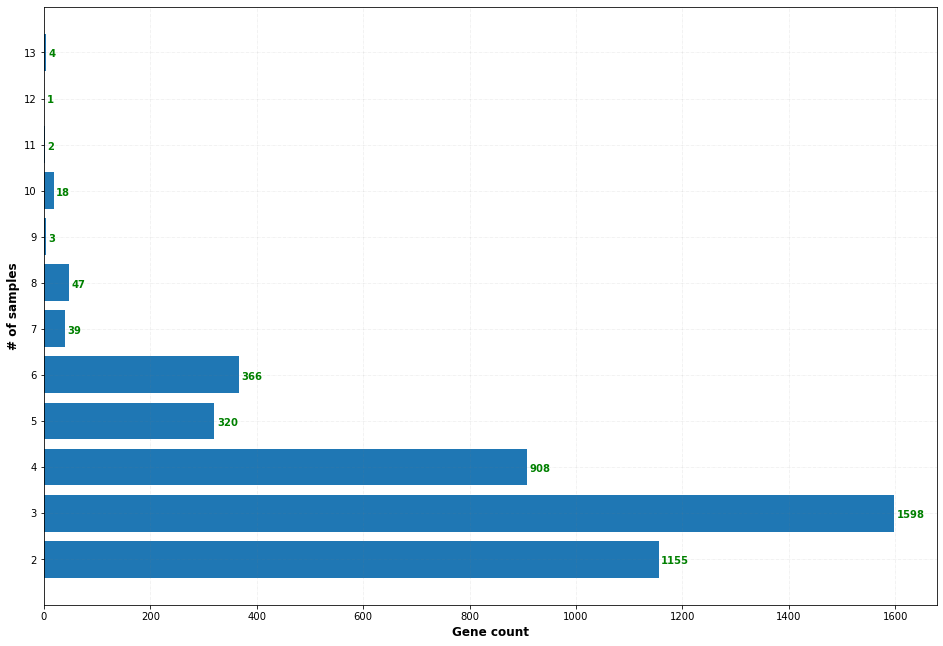

In [22]:
repeat_counts = count_elements(list(output_df_large_del_sorted_protein_coding_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Gene count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_del_gene_repeats.png', bbox_inches='tight', dpi=150)

In [23]:
### Large DUPs

output_df_large_dup_sorted_protein_coding = \
output_df_large_dup_sorted[output_df_large_dup_sorted['gene_type'] == 'protein_coding']

output_df_large_dup_sorted_protein_coding_bigger_than_1 = \
output_df_large_dup_sorted_protein_coding[output_df_large_dup_sorted_protein_coding['count'] > 1]

In [24]:
output_df_large_dup_sorted_protein_coding_bigger_than_1[output_df_large_dup_sorted_protein_coding_bigger_than_1['gene_name'] == 'EGFR']

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
125,chr7,55019017,55211628,ENSG00000146648.21,EGFR,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",12,12,12


In [25]:
count_elements(list(output_df_large_dup_sorted_protein_coding_bigger_than_1['count']))

{15: 1,
 14: 1,
 13: 14,
 12: 53,
 11: 174,
 10: 142,
 9: 215,
 8: 177,
 7: 44,
 6: 47,
 5: 53,
 4: 82,
 3: 600,
 2: 2401}

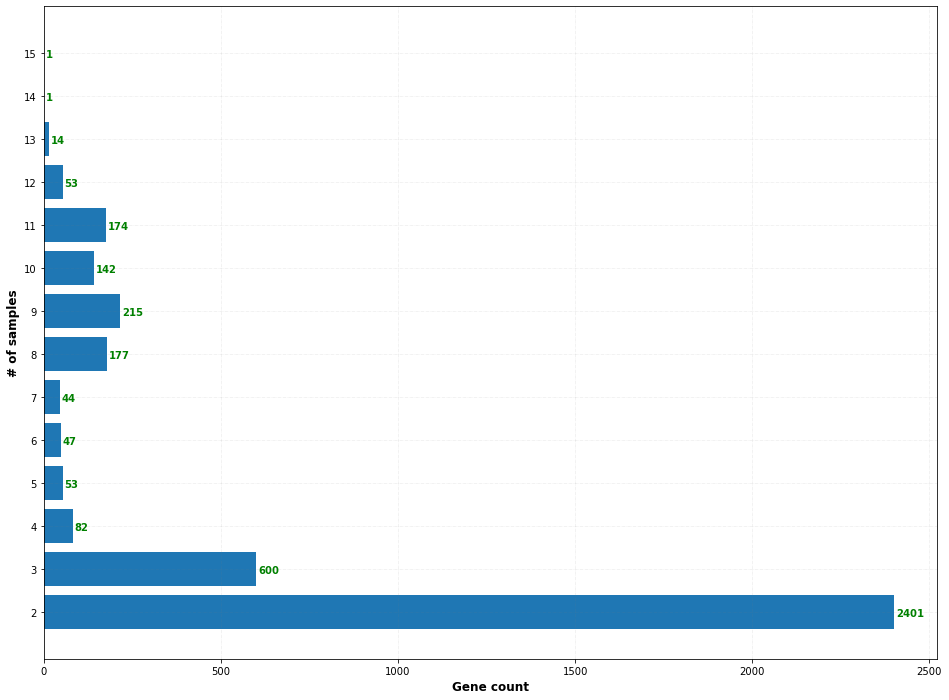

In [26]:
repeat_counts = count_elements(list(output_df_large_dup_sorted_protein_coding_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 12))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Gene count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_dup_gene_repeats.png', bbox_inches='tight', dpi=150)

In [27]:
### Large INVs

output_df_large_inv_sorted_protein_coding = \
output_df_large_inv_sorted[output_df_large_inv_sorted['gene_type'] == 'protein_coding']

output_df_large_inv_sorted_protein_coding_bigger_than_1 = \
output_df_large_inv_sorted_protein_coding[output_df_large_inv_sorted_protein_coding['count'] > 1]

In [31]:
output_df_large_inv_sorted_protein_coding_bigger_than_1[output_df_large_inv_sorted_protein_coding_bigger_than_1['count'] == 10]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
0,chr20,1561385,1620061,ENSG00000101307.16,SIRPB1,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10
2,chr20,1540144,1620009,ENSG00000260861.6,ENSG00000260861,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10


In [29]:
count_elements(list(output_df_large_inv_sorted_protein_coding_bigger_than_1['count']))

{10: 2, 6: 1, 5: 6, 4: 13, 3: 12, 2: 31}

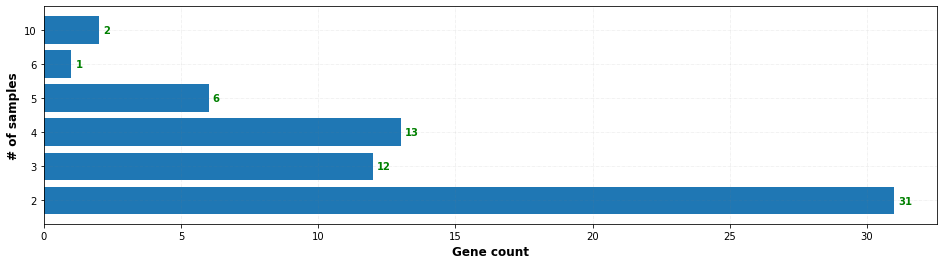

In [30]:
repeat_counts = count_elements(list(output_df_large_inv_sorted_protein_coding_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 4))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.15, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Gene count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_inv_gene_repeats.png', bbox_inches='tight', dpi=150)